In [1]:
import numpy as np

In [2]:
import pandas as pd

# Read the CSV file with UTF-8 encoding and a BOM
dataset= pd.read_csv('SMSSpamCollection',delimiter="\t",names=["label","message"])
dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
dataset.isnull().sum()

label      0
message    0
dtype: int64

In [5]:
dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
dataset["label"]=dataset["label"].map({"ham":0,"spam":1})
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [7]:
dataset.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [8]:
len(dataset[dataset["label"]==1])

747

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

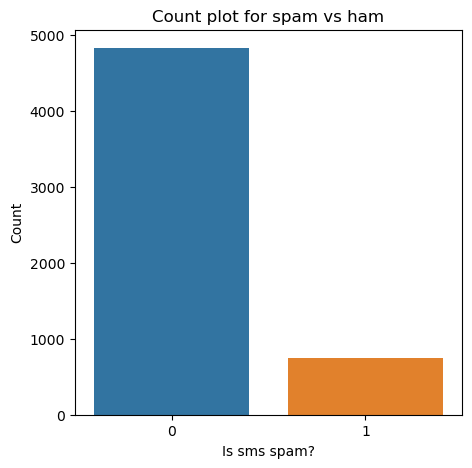

In [10]:
plt.figure(figsize=(5,5))

p=sns.countplot(x="label",data=dataset)
p=plt.title("Count plot for spam vs ham")
p=plt.xlabel("Is sms spam?")
p=plt.ylabel("Count")

In [11]:
only_spam = dataset[dataset["label"] == 1]
only_spam

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [12]:
count = int((dataset.shape[0] - only_spam.shape[0])/only_spam.shape[0])
count

6

In [13]:
for i in range(count-1):
    dataset = pd.concat([dataset,only_spam])
dataset["word_count"] = dataset["message"].apply(lambda x : len(x.split()))

dataset

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


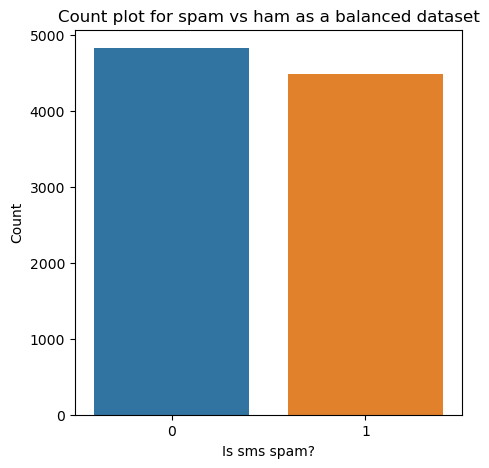

In [14]:
plt.figure(figsize=(5,5))

p=sns.countplot(x="label",data=dataset)
p=plt.title("Count plot for spam vs ham as a balanced dataset")
p=plt.xlabel("Is sms spam?")
p=plt.ylabel("Count")

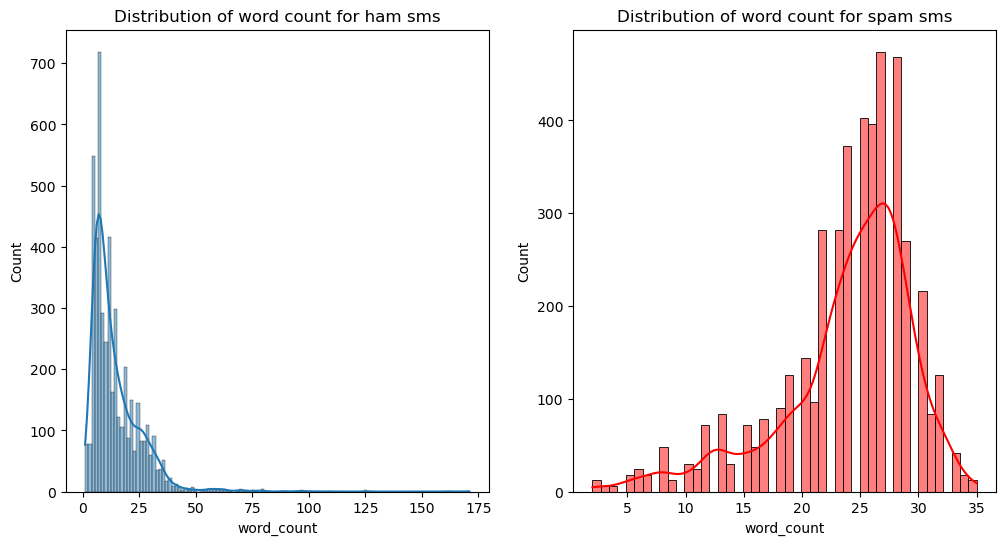

In [40]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
g = sns.histplot(dataset[dataset["label"]==0].word_count,kde=True)
p = plt.title("Distribution of word count for ham sms")

plt.subplot(1,2,2)
g = sns.histplot(dataset[dataset["label"]==1].word_count,kde=True,color="red")
p = plt.title("Distribution of word count for spam sms")

In [16]:
def currency(data):
    symbols =["$","€","£","₹","¥"]
    for i in symbols:
        if i in data:
            return 1
    return 0



In [17]:
dataset["has_currency_symbol"] = dataset["message"].apply(currency)

dataset

,label,message,word_count,has_currency_symbol
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


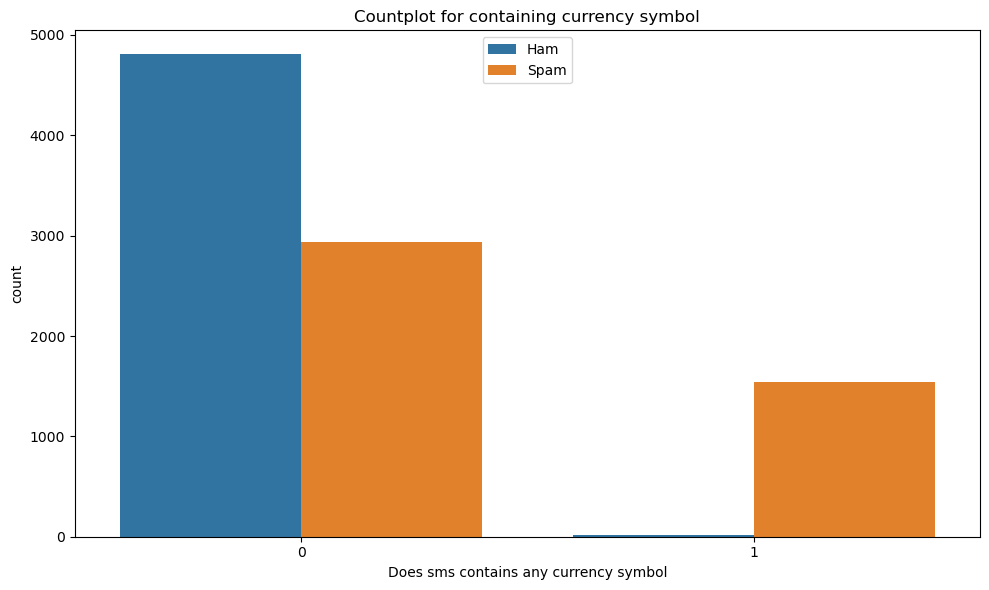

In [18]:
plt.figure(figsize=(10,6))

g=sns.countplot(x="has_currency_symbol",data=dataset,hue="label")
p=plt.title('Countplot for containing currency symbol')
p=plt.xlabel('Does sms contains any currency symbol')
p=plt.ylabel('count')
p=plt.legend(labels=["Ham","Spam"],loc=9)
plt.tight_layout()
plt.show()


In [19]:
def number(data):
    for i in data:
        if ord(i) >= 48 and ord(i)<= 57: 
            return 1
    return 0

In [20]:
dataset['has_number']=dataset['message'].apply(number)
dataset

,label,message,word_count,has_currency_symbol,has_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


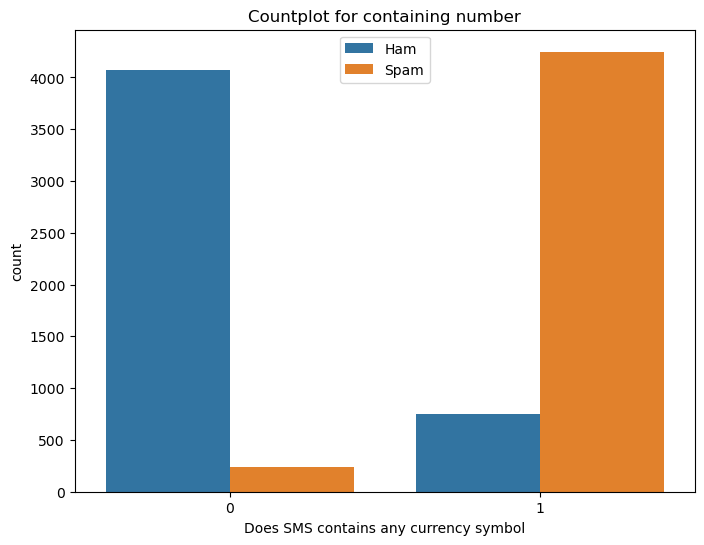

In [21]:
plt.figure(figsize=(8,6))

g=sns.countplot(x="has_number",data=dataset,hue="label")
p=plt.title("Countplot for containing number")
p=plt.xlabel('Does SMS contains any currency symbol')
p=plt.ylabel('count')
p=plt.legend(labels=['Ham','Spam'],loc=9)

In [22]:
#data cleaning

import nltk
import re

nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to E:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to E:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
corpus =[]
stopwordsset = set(stopwords.words('english'))
wnl=WordNetLemmatizer()
for sms in list(dataset.message):
    message = re.sub(pattern='[^a-zA-Z]',repl=' ',string=sms) #filtering out special characters
    message=message.lower()
    words = message.split() #Tokenizer
    filter_words = [word for word in words if word not in stopwordsset ]
    lemm_words = [wnl.lemmatize(word) for word in filter_words ]

    message = ' '.join(lemm_words)
    corpus.append(message)

corpus


['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [24]:
#creating the bag of words model

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()


In [25]:
X = pd.DataFrame(vectors,columns=feature_names)
y = dataset['label']
X

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.4117,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9302,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9303,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.326017,0.0,0.0,0.0,0.0,0.0
9304,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.287064,0.0,0.0,0.0,0.0,0.0
9305,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [26]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5537    1
5540    1
5547    1
5566    1
5567    1
Name: label, Length: 9307, dtype: int64

In [27]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import classification_report , confusion_matrix
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
#multinomial naive baeyes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv= cross_val_score(mnb,X,y,scoring='f1',cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))


0.943
0.004


In [29]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)


In [30]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [31]:
y_test

1155    0
1790    0
3003    0
1122    1
592     1
       ..
4147    0
274     0
1345    0
2367    1
4031    0
Name: label, Length: 1862, dtype: int64

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       959
           1       0.94      0.94      0.94       903

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



In [33]:
cm= confusion_matrix(y_test,y_pred)
cm

array([[905,  54],
       [ 56, 847]], dtype=int64)

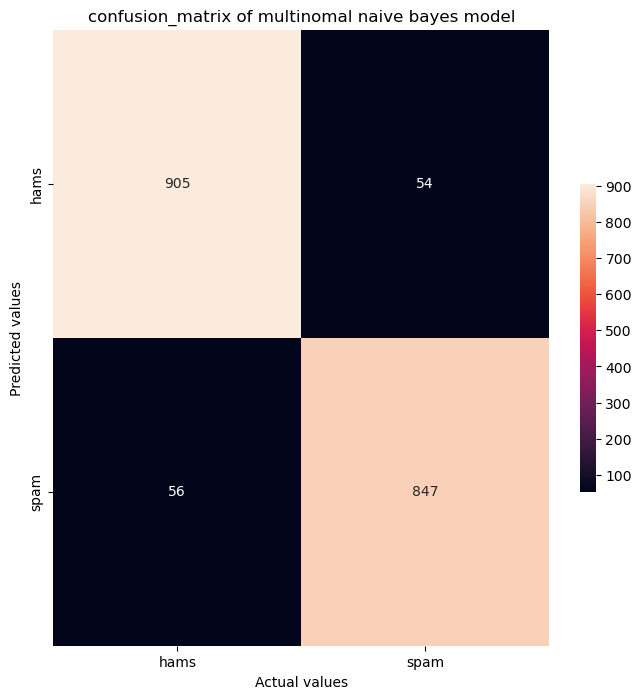

In [34]:
plt.figure(figsize=(8,8))
axis_labels = ['hams','spam']
g=sns.heatmap(data=cm,xticklabels=axis_labels,yticklabels=axis_labels,annot=True,fmt='g',cbar_kws={'shrink':0.5})
p=plt.title("confusion_matrix of multinomal naive bayes model")
p=plt.xlabel("Actual values")
p=plt.ylabel("Predicted values")
plt.show()

In [35]:
#decision trees
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
cv1 = cross_val_score(dt,X,y,scoring='f1',cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))
print(classification_report(y_test,y_pred))

0.98
0.004
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       959
           1       0.94      0.94      0.94       903

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



In [36]:
cm1= confusion_matrix(y_test,y_pred)
cm1

array([[905,  54],
       [ 56, 847]], dtype=int64)

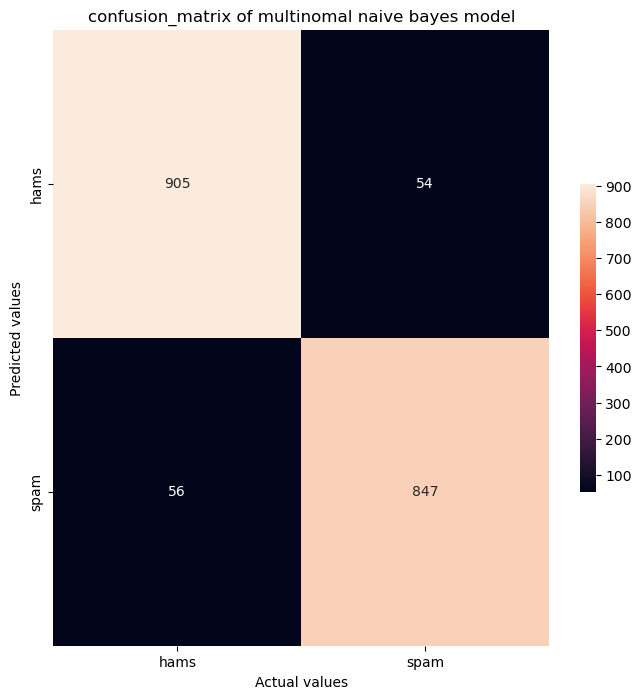

In [37]:

plt.figure(figsize=(8,8))
axis_labels = ['hams','spam']
g=sns.heatmap(data=cm1,xticklabels=axis_labels,yticklabels=axis_labels,annot=True,fmt='g',cbar_kws={'shrink':0.5})
p=plt.title("confusion_matrix of multinomal naive bayes model")
p=plt.xlabel("Actual values")
p=plt.ylabel("Predicted values")
plt.show()

In [38]:
def predict_spam(sms):
    stopwordsset = set(stopwords.words('english'))
    message = re.sub(pattern='[^a-zA-Z]',repl=' ',string=sms)
    message = message.lower()
    words = message.split() #Tokenizer
    filter_words = [word for word in words if word not in stopwordsset ]
    lemm_words = [wnl.lemmatize(word) for word in filter_words ]

    message = ' '.join(lemm_words)
    temp=tfidf.transform([message]).toarray()
    return dt.predict(temp)

In [39]:
sample = "WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! Valid 12 hours only."

if(predict_spam(sample)):
    print("Spam!")
else:
    print("HAM")

Spam!


e:\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
